In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# load dataset
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [61]:
# reshape data to have a single channel
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [62]:
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(np.unique(y_train))
print("in_shape = ", in_shape, "n_classes = ", n_classes)
# normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

in_shape =  (28, 28, 1) n_classes =  10


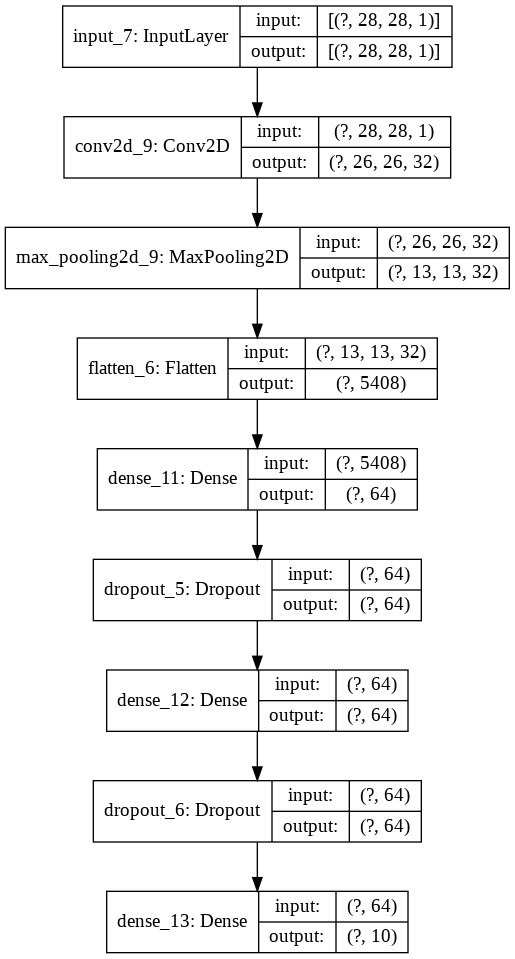

In [63]:
# define model

inputs = keras.Input(shape = in_shape)
x = Conv2D(32, 3, activation='relu', kernel_initializer='he_uniform')(inputs)
x = MaxPool2D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(rate = 0.2)(x)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(rate = 0.2)(x)
outputs = Dense(n_classes, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# compile model
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# plot model
keras.utils.plot_model(model, show_shapes=True)

In [64]:
# early stopping
es = EarlyStopping(patience=5)
# fit model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=0, validation_split=0.3, callbacks=[es])
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy = ', acc)

Accuracy =  0.9853000044822693


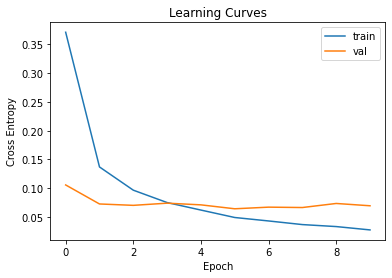

In [65]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()